In [3]:
from huri.task_planning.tube_puzzle_learning_solver import DQNSolver
import huri.core.file_sys as fs

dqn_solver = DQNSolver(
    model_path=fs.workdir_learning / "run" / f"dqn_2022_04_05_20_36_49" / "model" / "model_244000-246000.pth",
    num_tube_classes=3,
    rack_size=(3, 5),
)

Random init state is [[3 1 1 0 2]
 [3 3 1 0 1]
 [0 0 3 0 0]]


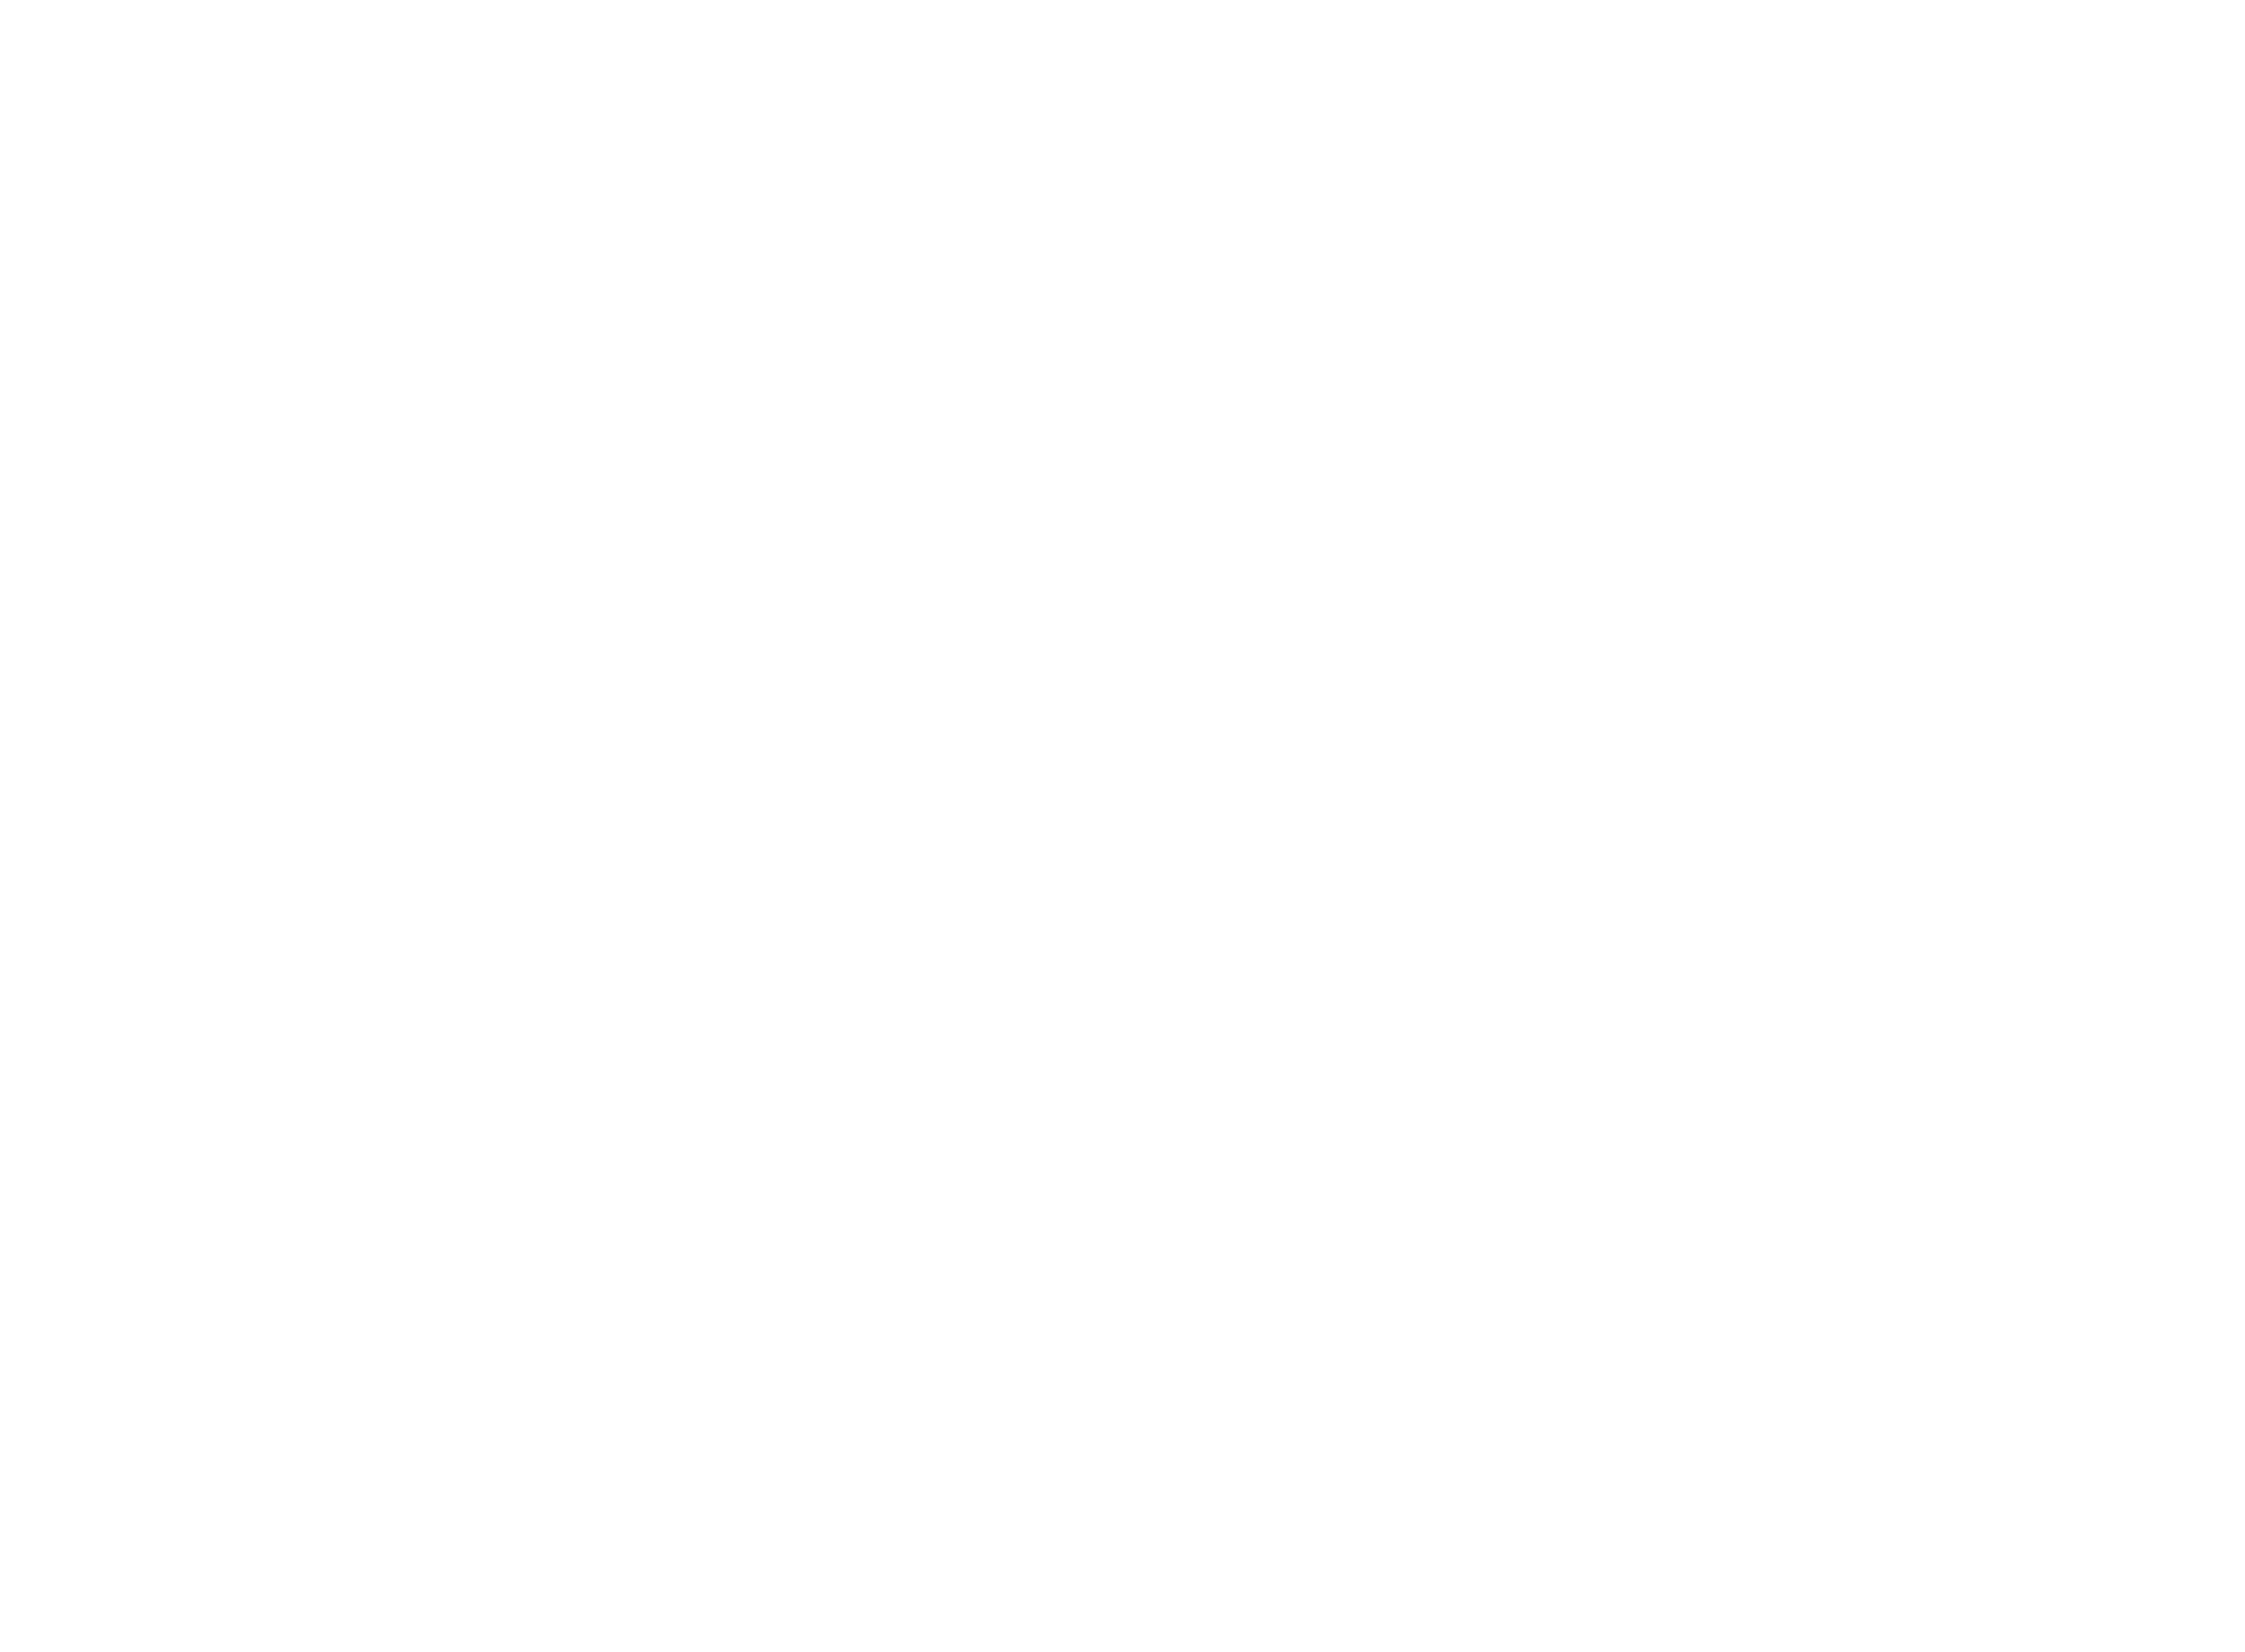

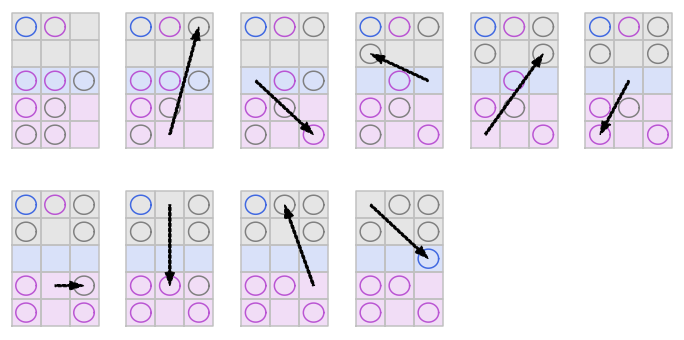

In [16]:
import numpy as np
from huri.learning.env.arrangement_planning_rack.env import RackArrangementEnv, RackStatePlot

# initialize the environment
num_tube_classes = 3
rack_size = (3, 5)
action_space_dim = np.prod(rack_size) ** 2
observation_space_dim = (1, *rack_size)
env = RackArrangementEnv(rack_size=rack_size,
                         num_classes=num_tube_classes,
                         observation_space_dim=observation_space_dim,
                         action_space_dim=action_space_dim,
                         is_curriculum_lr=True,
                         is_goalpattern_fixed=True,
                         seed=1999,
                         difficulty=10)
env.goal_pattern = np.array([[1, 1, 2, 3, 3],
                             [1, 1, 2, 3, 3],
                             [1, 1, 2, 3, 3]])
random_init_state = env.reset()
print(f"Random init state is {random_init_state}")
path = dqn_solver.solve(random_init_state.state,
                        env.goal_pattern.state,
                        infeasible_dict={})
drawer = RackStatePlot(env.goal_pattern.state)
fig = drawer.plot_states(path, 6)
fig.save_fig("N", dpi=200)
# plt.show()

